## Importing the libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
import numpy as np
from imblearn.over_sampling import SMOTE

## Importing the dataset

In [58]:
# Carregar os dados
data = pd.read_csv('air_system_present_year.csv')

## Verificando linhas duplicadas

In [59]:
data.duplicated().sum()

np.int64(0)

## Separate features (X) and target (y)

In [60]:
X = data.drop(columns=['class'])
y = data['class']

## Replace 'na' with NaN to represent missing values

In [61]:
X.replace('na', np.nan, inplace=True)

## Taking care of missing data

In [62]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Initializing the imputer with the mean strategy
imputer.fit(X) # Fitting the imputer to the data
X= imputer.transform(X) # Transforming the data with missing values replaced by the mean
X = pd.DataFrame(X) # Converting back to DataFrame for easy manipulation

missing_values = X.isnull().sum()
print(missing_values)

0      0
1      0
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Length: 170, dtype: int64


## Check for missing values

In [63]:
missing_values = X.isnull().sum()
print(missing_values)

0      0
1      0
2      0
3      0
4      0
      ..
165    0
166    0
167    0
168    0
169    0
Length: 170, dtype: int64


## Encoding the Dependent Variable

In [64]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

## veryfing the quantity of 'neg' and 'pos'

neg = trucks that had a defect in any system other than the air system.<br>
pos = trucks that had defects in the air system.

I veryfied that the class is unbalanced

In [65]:
#verificando quantidade de caminhões com defeito
df_defeito = data['class'].value_counts()
print(df_defeito)

class
neg    15625
pos      375
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x14ec52502f0>,
 [Text(0, 0, 'sem defeito'), Text(1, 0, 'com defeito')])

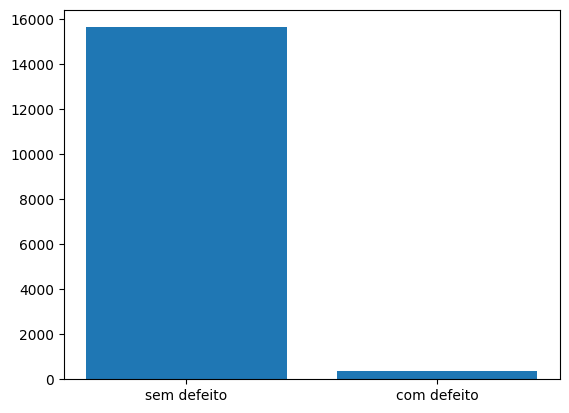

In [66]:
plt.bar(x = df_defeito.index, height = df_defeito)
plt.xticks([0,1],['sem defeito','com defeito'])

## Balancing classes with SMOTE

In [67]:
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)
pd.DataFrame(y_balanced).value_counts()

0
0    15625
1    15625
Name: count, dtype: int64

## Splitting the dataset into the Training set and Test set

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42)

## Defining the models

In [69]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
}


## training the models and displaying evaluation metrics

In [70]:

for model_name, model in models.items():
    print(f"Training and evaluating the model: {model_name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

  
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"ROC-AUC: {roc_auc}")
    print("\n" + "="*60 + "\n")
    
  

Training and evaluating the model: Random Forest
ROC-AUC: 0.9999383873148546


Training and evaluating the model: Decision Tree
ROC-AUC: 0.9902961301292689


Training and evaluating the model: Logistic Regression
ROC-AUC: 0.9869878925696024




c:\Users\lucas.oliveira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Challenge Activities

### <strong>--Steps--</strong>
#### <strong>1. Analyzing the problem</strong>

The main issue in this scenario is the increasing maintenance costs related to the air system of the fleet trucks..<br>

#### <strong>2. Exploratory Data Analysis</strong>

During the dataset analysis, I located the features and the target variable, where I noticed that the 'class' field could serve as the target for predictions, as it indicates whether a truck has an air system defect.<br>

#### <strong>3. Data Preprocessing</strong>

As per the case description, missing values are denoted by 'na', so I replaced these with NaN.<br>

Next, I handled these NaN values by replacing them with the mean of their respective columns. This approach was chosen to retain potentially valuable data without resorting to deletion, which could lead to information loss.<br>

I observed that the 'class' field is in string format and contains only two values, 'pos' and 'neg'. Consequently, I utilized LabelEncoder to transform these categorical values into numerical equivalents (0 and 1).<br>

Upon counting the categorical variables, I noted an imbalance. To address this, I applied SMOTE to balance the dataset. This method avoids the removal of data from the majority class, thereby preserving dataset integrity and maintaining model effectiveness.<br>

I performed the data split for training and testing, dividing the data into 20% for testing and 80% for training, using RandomState 42 to keep the same values for the tests.<br>

#### <strong>3. Training </strong>

For the training, I defined three classification models to evaluate the performance: Random Forest, Decision Tree Classifier, and Logistic Regression.<br>

#### <strong>4. Evaluation </strong>

For the evaluation stage, I used the ROC AUC metric, which is a performance measure used in binary classification models, which is our case.<br>

Among the three models, the best-performing model in the evaluation was the Random Forest model.<br>








































